#  Linear Regression


## Exercise (fictitious)

Se tiene una serie de mediciones ($x$) de un conductímetro sobre un fluido y las mediciones ($y$) del mismo fluido que al ser analizadas por un espectrómetro de masas en un laboratorio genera la concentración de un elemento químico que determina la calidad del agua. Realizar un algoritmo un programa de ML capaz de estimar la concentración del elemento químico en nuevas muestras.

Utilizar [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)





### Understanding Data

Descriptive analytics

- What questions would you ask to understand the data?
- What visualization tools to use?

,sample,X,y
count,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.005000,32.158520
std,1154.844867,11.548449,22.767042
min,0.000000,-20.000000,-150.000000
25%,999.750000,-10.002500,14.446465
50%,1999.500000,-0.005000,31.890758
75%,2999.250000,9.992500,50.354628
max,3999.000000,19.990000,73.684404


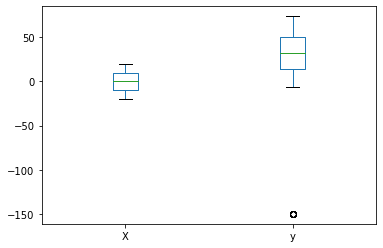

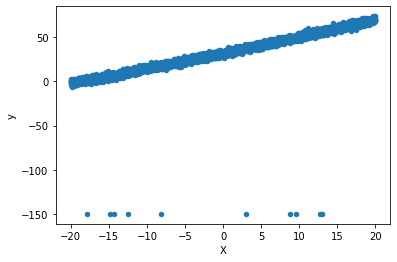

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, HTML


# Analisis preliminar de datos

df=pd.read_csv('https://docs.google.com/spreadsheets/d/1jWSsUNYeuokmw03_WH2_paQ_o_eo589l5CJ68H2ZJ7o/gviz/tq?tqx=out:csv&sheet=laboratorio_aguas')


df[['X','y']].plot.box()
df.plot.scatter(x='X',y='y')
df.describe()
#plt.savefig('scatter.pdf',format='pdf')


### Preparing the data


**Clean Data**

What Happen with the Outlier at -150?

When machine give  -150.0 is because there occur some problem over the experiment

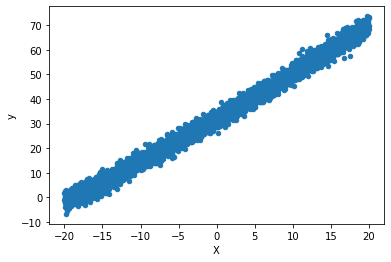

In [ ]:

#TODO: remove the outlier
new_data=df
new_data.plot.scatter(x='X',y='y')


#### Split training and text data

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. Note that the word “experiment” is not intended to denote academic use only, because even in commercial settings machine learning usually starts out experimentally.

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
# split training and text data
X=new_data['X'].values.reshape(-1,1)
y=new_data['y'].values.reshape(-1,1)
#TODO: use train_test_split
X_train, X_test, y_train, y_test = 0,0,0,0



In [ ]:
X_train.shape

(3192, 1)

### Modeling



First we are going to do the algorithm by numpy and then we will review the libraries

#### Train the model (numpy analytical)



In [ ]:
n=X_train.shape[0]
uno=np.ones((n,1))
Phi=np.concatenate((X_train,uno), axis=1)

$$\theta=(\Phi^T \Phi )^{-1}\Phi^T y$$

In [ ]:
##TODO use np.matmul,np.linalg.inv and the formula (\Phi'\Phi)^-1\Phi'y_train
theta= 0
theta

array([[ 1.80357831],
       [32.59926942]])

#### Train the model (Numerical approximaton)

Normally the optimization process (Learning process) is does not have analytical solution, so numerical methods should be used to obtain the minimum or maxima of the cost function. The first approximation is the gradient descent algorithm, which change the estimated parameters $\theta$ proportional to the gradient of the cost function


![graphic](https://alykhantejani.github.io/images/gradient_descent_line_graph.gif) 


[texto del vínculo](https://)

---
**for** *i* in range(max_iterations)<br/>
&nbsp;&nbsp;  $c_i=cost(\Phi,\hat{\theta},y)$<br/>
&nbsp;&nbsp;  **if** $c_i-c_{i-1}<$tolerance<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    exit<br/>
&nbsp;&nbsp;  **else**<br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   $\hat{\theta}-=\alpha.gradient(\Phi,\hat{\theta},y$) 

---

Like  our function is a **Linear Function**
$$ \hat{\mathbf{y}}=\Phi\hat{\theta} $$
The functions are:

**Cost Function**
$$ Cost=\mathbf{V}=\frac{1}{n}\left(\mathbf{y}-\hat{\mathbf{y}}\right)^{T}\left(\mathbf{y}-\hat{\mathbf{y}}\right)$$
**Gradient cost function**

$$Gradient=\frac{d\mathbf{V}}{d\theta}=\frac{2}{n}\Phi^{T}\left(\hat{\mathbf{y}}-\mathbf{y}\right)$$

*max_iterations*, *tolerance* and $alpha$ are hyperparameters.


In [ ]:
import numpy as np
def linear_regressor(Phi,theta):
  return np.matmul(Phi,theta)

In [ ]:
def fit_params(Phi, y, theta,learning_rate = 0.5e-2,tol=1e-5,max_iterations=10000):
    #TODO: implement the cost and gradient functions
    costs = [np.inf]
    n=Phi.shape[0]
    for i in range(0, max_iterations):
        y_hat=linear_regressor(Phi,theta)  
        my_cost = 0    
        if abs(my_cost - costs[-1]) < tol:
            break
        else:
            my_gradient = 0
            theta = theta - learning_rate * my_gradient
            costs.append(my_cost)           
    return theta, costs

In [ ]:
new_t = np.random.normal(size=(2,1 )).astype(np.float32)
print(new_t)
theta_hat, outcost = fit_params(Phi,y_train,new_t,learning_rate = .5e-2)
theta_hat

[[1.6860559 ]
 [0.16799425]]


array([[ 1.8035966 ],
       [32.57727022]])

Text(0.5, 1.0, 'cost function')

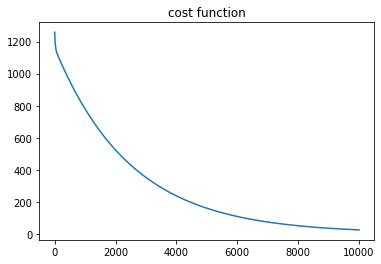

In [ ]:
import matplotlib.pyplot as plt

plt.plot(outcost)
plt.title('cost function')

#### Train the model (scikit-learn)

Train the model consist in  make  the optimization to obtain the long memory paramters of the model.

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets (function fit)


# The coefficients
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[1.80357831]]
Intercept:  [32.59926942]


#### Test the Model

Can we generalize our model to work good with other data?

regressor score                |      0.99
Mean squared error             |      4.17
mean_squared_error             |      4.17
mean_absolute_error            |      1.63
median_absolute_error          |      1.38
explained_variance_score       |      0.99
r ^ 2 score                    |      0.99


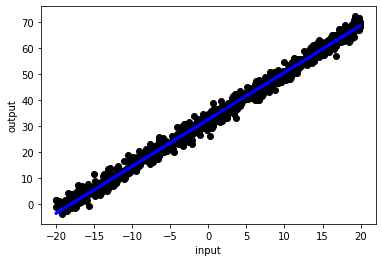

In [ ]:
from sklearn.metrics import accuracy_score,median_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score,mean_squared_log_error,explained_variance_score


def test_model(X,y_test,regr):
  #prediction
  y_pred=regr.predict(X)
  ##graficas

  plt.scatter(X, y_test,  color='black')
  plt.plot(X, y_pred, color='blue',linewidth=3)
  plt.xlabel('input')
  plt.ylabel('output')


 
  print('{0:30} | {1:9.2f}'.format('regressor score', regr.score(X,y_test)))
  print('{0:30} | {1:9.2f}'.format('Mean squared error', np.mean((y_pred - y_test) ** 2)))
  #TODO: use the regression metrics function to calculate the validity of the model
  # https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

  
test_model(X_test,y_test,regr)

### Implementation


How it is going to work inside the process and organization?

In [ ]:
def conversor(x):
  return regr.predict(x)

**Version 2** Using [persistence](https://scikit-learn.org/stable/tutorial/basic/tutorial.html#model-persistence).

Other way to generate persistence is to send the parameters of the models ``regr.coef_`` and ``regr.intercept_``, but some models has many parameters.

In [ ]:
#saving the model (just one time after training)
import pickle #for save the model

name_file='water_lab.pkl'
myfile = open(name_file, 'wb')
pickle.dump(regr,myfile)
myfile.close()


In [ ]:
import pickle #for save the model
def conversor(x,model_file):
  # load the model with the trained model 
  ## example, this function can be a web server in django 
  new_file = open(model_file, 'rb')
  clf2 = pickle.load(new_file)
  #TODO: use predict of the regressor
  y_=0
  return y_

y_=conversor(np.array([5]).reshape(1,1),'water_lab.pkl')
# after this point a lot of data engineering would be required...
y_[0][0]

41.617160994774935

In [ ]:
!pip install flask-ngrok

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask
from flask import request, jsonify
import pickle

model_file='water_lab.pkl'
new_file = open(model_file, 'rb')
clf2 = pickle.load(new_file)
app = Flask(__name__)

run_with_ngrok(app)   #starts ngrok when the app is run
@app.route("/")
def home():
    return '<h1>This is an api of our machine learning model!</h1> Try api/lab?x=5. <a href="api/lab?x=5">example</a>'

@app.route('/api/lab', methods=['GET'])
def api_id():
    # Check if an x was provided as part of the URL.
    if 'x' in request.args:
        x = int(request.args['x'])
    else:
        return "Error: No id field provided. Please specify the value x."
    a=clf2.predict(np.array([x]).reshape(1,1))[0][0]
    return jsonify(a)
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://0e764cfec22a.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [17/Feb/2021 03:07:26] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Feb/2021 03:07:26] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [17/Feb/2021 03:07:28] "GET /api/lab?x=5 HTTP/1.1" 200 -
127.0.0.1 - - [17/Feb/2021 03:09:59] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Feb/2021 03:10:01] "GET /api/lab?x=5 HTTP/1.1" 200 -


## Is the better solution to use a linear regressor?

When evaluating different settings (“hyperparameters”) for estimators or differents estimators, there are the risk of overfitting on the test set because the selection of the model can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). 


**Exercise**

Cambiar el metodo de scoring y usar diferents tipos de regresores.


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score


regressors = [linear_model.LinearRegression(),linear_model.Ridge(alpha=.7),
              MLPRegressor(hidden_layer_sizes=(22,100,),activation='relu',max_iter=100000),
              linear_model.RANSACRegressor(random_state=0)]
names = ['lineal','ridge 0.7','MLP','RANSAC']
#from https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
scoring =['explained_variance',
          'neg_mean_absolute_error',
          'neg_mean_squared_error',
          'neg_mean_squared_log_error',
          'neg_median_absolute_error',
          'r2']



for reg,name in zip(regressors,names):
    scores = cross_val_score(reg, X_train, y_train.ravel(), scoring=scoring[5],
                            cv=5)
    print('--------------------------------------')
    print('model {0:20} | score {1:20}'.format(name,scoring[5]))
    print('mean {0:22.2f}| std   {1:<22.2f}'.format(scores.mean(),scores.std()))
    print("Accuracy(95.7%): {0:23.2f} (+/- {1:.2f})" .format(scores.mean(), scores.std() * 2))
    


--------------------------------------
model lineal               | score r2                  
mean                   0.42| std   0.06                  
Accuracy(95.7%):                    0.42 (+/- 0.12)
--------------------------------------
model ridge 0.7            | score r2                  
mean                   0.42| std   0.06                  
Accuracy(95.7%):                    0.42 (+/- 0.12)
--------------------------------------
model MLP                  | score r2                  
mean                   0.42| std   0.06                  
Accuracy(95.7%):                    0.42 (+/- 0.12)
--------------------------------------
model RANSAC               | score r2                  
mean                   0.39| std   0.07                  
Accuracy(95.7%):                    0.39 (+/- 0.14)


In [ ]:
    
#after this point repeat test and implementation process whith the best model.
model=regressors[2].fit(X_train,y_train.ravel())
test_model(X_test,y_test,model)

## Now use other dataset

Present conclusions and try to use differents techinques of visualization!!
- [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)
- [Kaggle](https://www.kaggle.com/datasets)
- other of your preferrence


In [ ]:
# Load CSV using Pandas from URL
import pandas as pd
from IPython.display import display, HTML

data = 